**Handwritten Digit Classification with SVM or KNN**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [26]:
# Load the MNIST dataset
train_data, val_data, test_data = tfds.load('mnist', split=['train[:80%]', 'train[80%:]','test'], as_supervised=True)

In [27]:
# Preprocess data by normalizing and reshaping
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) / 255.0
    return tf.reshape(image, [-1]).numpy(), label.numpy()

In [28]:
# Split data into samples and labels for each set
x_train, y_train = zip(*[preprocess(image, label) for image, label in train_data])
x_train, y_train = np.array(x_train), np.array(y_train)

x_val, y_val = zip(*[preprocess(image, label) for image, label in val_data])
x_val, y_val = np.array(x_val), np.array(y_val)

x_test, y_test = zip(*[preprocess(image, label) for image, label in test_data])
x_test, y_test = np.array(x_test), np.array(y_test)

2024-12-04 10:18:20.473720: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [29]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=100)

x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.transform(x_val)
x_test_pca = pca.transform(x_test)

**SVM**

In [6]:
# Function for training using SVM
def SVM(kernel, C, gamma, x_train, y_train):
    svm_model = SVC(kernel=kernel, C=C, gamma=gamma)
    svm_model.fit(x_train, y_train)
    return svm_model

In [8]:
svm_model_linear = SVM('linear', 1.0, 'scale', x_train_pca, y_train)

In [ ]:
# Train SVM with Linear kernel and Radial Basis Function (RBF) kernel
svm_model_linear = SVM('linear', 1.0, 'scale', x_train_pca, y_train)
svm_model_rbf = SVM('rbf', 1.0, 'scale', x_train_pca, y_train)

In [10]:
# Linear Kernel
# SVM Prediction on validation data and accuracy score
svm_pred_val_linear = svm_model_linear.predict(x_val_pca)
svm_acc_val_linear = accuracy_score(y_val, svm_pred_val_linear)

# SVM Prediction on test data and accuracy score
svm_pred_test_linear = svm_model_linear.predict(x_test_pca)
svm_acc_test_linear = accuracy_score(y_test, svm_pred_test_linear)

# RBF Kernel
# SVM Prediction on validation data and accuracy score
svm_pred_val_rbf = svm_model_rbf.predict(x_val_pca)
svm_acc_val_rbf = accuracy_score(y_val, svm_pred_val_rbf)

# SVM Prediction on test data and accuracy score
svm_pred_test_rbf = svm_model_rbf.predict(x_test_pca)
svm_acc_test_rbf = accuracy_score(y_test, svm_pred_test_rbf)

print("SVM Accuracy:")
print("Linear Kernel:")
print(f"SVM Accuracy on validation set: {svm_acc_val_linear:.2f}")
print(f"SVM Accuracy on test set: {svm_acc_test_linear:.2f}\n")
print("Radial Bais Function (RBF) Kernel:")
print(f"SVM Accuracy on validation set: {svm_acc_val_rbf:.2f}")
print(f"SVM Accuracy on test set: {svm_acc_test_rbf:.2f}")

SVM Accuracy:
Linear Kernel:
SVM Accuracy on validation set: 0.69
SVM Accuracy on test set: 0.71

Radial Bais Function (RBF) Kernel:
SVM Accuracy on validation set: 0.98
SVM Accuracy on test set: 0.98


**KNN**

In [11]:
# Function for training using KNN
def KNN(k, x_train, y_train):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    return knn_model

In [12]:
# Train KNN 
knn_model = KNN(3, x_train_pca, y_train)

In [13]:
# KNN Prediction on validation data and accuracy score
knn_pred_val = knn_model.predict(x_val_pca)
knn_acc_val = accuracy_score(y_val, knn_pred_val)
print(f"KNN Accuracy on validation set: {knn_acc_val:.2f}")

# KNN Prediction on test data and accuracy score
knn_pred_test = knn_model.predict(x_test_pca)
knn_acc_test = accuracy_score(y_test, knn_pred_test)
print(f"KNN Accuracy on test set: {knn_acc_test:.2f}")

KNN Accuracy on validation set: 0.97
KNN Accuracy on test set: 0.97


In [24]:
# KNN K-Fold Cross Validation
cv_scores = cross_val_score(knn_model, x_train_pca, y_train, cv=3)
print(f"Cross Validation Score: {cv_scores.mean():.2f}")

Cross Validation Score: 0.97


In [14]:
# Print classification reports
print("SVM Classification Report using RBF:\n", classification_report(y_test, svm_pred_test_rbf))
print("KNN Classification Report:\n", classification_report(y_test, knn_pred_test))

SVM Classification Report using RBF:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2

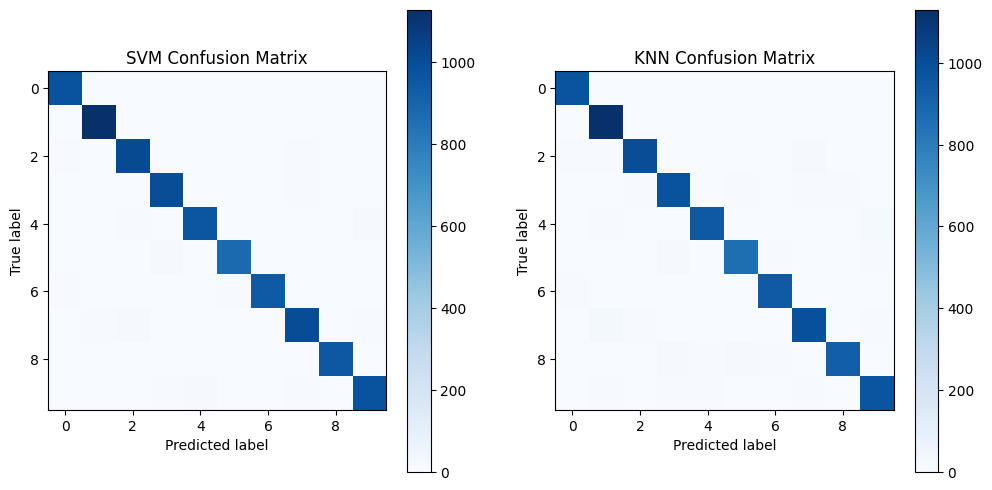

In [15]:
# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("SVM Confusion Matrix")
plt.imshow(confusion_matrix(y_test, svm_pred_test_rbf), cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.subplot(1, 2, 2)
plt.title("KNN Confusion Matrix")
plt.imshow(confusion_matrix(y_test, knn_pred_test), cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()